Sentiment analysis is a Natural Language Processing (NLP) approach used for identifying the emotional tone of data and classifying it as negative, neutral, or positive. It is performed to analyze text data and gain insights into opinions that the data reflects. Sentiment analysis can be especially useful in analyzing product reviews to understand customer feedback and evaluate how a product is performing. This project builds a sentiment analyzer using a famous NLP library, TextBlob as well as uses Pandas for data manipulation and analysis, and Matplotlib for data visualization. For this project, the chosen product of interest is the “Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue” with the ID "AVpjEN4jLJeJML43rpUe".

**Data Description:**

The dataset used contains 34660 reviews (rows) of products sold at Amazon with 21 features (columns). The following is a descriptive list of the features:

id: product ID for identification of products

name: name of product

asins: Amazon Standard Identification Number

brand: brand name of the product

categories: type of category under which the product falls

keys: amazon key

manufacturer: manufacturer of the product

reviews.date: date of the review

reviews.dateAdded: the date when the review was added

reviews.dateSeen: the date when the review was seen

reviews.didPurchase: whether the reviewer purchased the product

reviews.doRecommend: whether the reviewer recommends the product

reviews.id: id of the review

reviews.numHelpful: number of people that found the review helpful

reviews.rating: rating provided by user

reviews.sourceURL: URL of the review

reviews.text: the review text

reviews.title: title of the review

reviews.userCity: -

reviews.userProvince: -

reviews.username: username of the reviewer


**Methods Used:**

Created a sentiment analyzer function that uses TextBlob to analyze and classify the sentiment of a given text.

Evaluated the function to make sure it correctly classifies the text by passing a set of words and their sentiment.

Loaded the dataset which is a CSV file into a DataFrame and preprocessed it by filtering out the chosen product and discarding irrelevant data. 

Applied the sentiment analyzer function to the DataFrame and stored the sentiment as a new column.

Performed visualization and analysis such as for the count of reviews of each sentiment and more. Also printed some examples of the reviews of each sentiment and some possible misclassifications. 

Exported the DataFrame to a CSV file.


In [1]:
# Import all the required libraries.

import pandas as pd 
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
# Define a sentiment analyzer function that returns the sentiment based on the polarity of the text.

def sentimentAnalyzer(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity < -0.2:
        return 'Negative'
    elif polarity < 0.2:
        return 'Neutral'
    else:
        return 'Positive'

In [3]:
# Define a dictionary to hold words with their sentiment.

words = {
    'happy': 'Positive',
    'exciting': 'Positive',
    'good': 'Positive',
    'rich': 'Positive',
    'smile': 'Positive',
    'disappointed': 'Negative',
    'sad': 'Negative',
    'bad': 'Negative',
    'poor': 'Negative',
    'anger': 'Negative',
    'food': 'Neutral',
    'animal': 'Neutral'

}

# Test the sentiment analyzer

for word, polarity in words.items():
    sentiment = sentimentAnalyzer(word)

    print("Word: {} | Polarity: {} | Sentiment: {}".format(word, polarity, sentiment))

Word: happy | Polarity: Positive | Sentiment: Positive
Word: exciting | Polarity: Positive | Sentiment: Positive
Word: good | Polarity: Positive | Sentiment: Positive
Word: rich | Polarity: Positive | Sentiment: Positive
Word: smile | Polarity: Positive | Sentiment: Positive
Word: disappointed | Polarity: Negative | Sentiment: Negative
Word: sad | Polarity: Negative | Sentiment: Negative
Word: bad | Polarity: Negative | Sentiment: Negative
Word: poor | Polarity: Negative | Sentiment: Negative
Word: anger | Polarity: Negative | Sentiment: Negative
Word: food | Polarity: Neutral | Sentiment: Neutral
Word: animal | Polarity: Neutral | Sentiment: Neutral


In [22]:
# Read the data from the CSV file.

df = pd.read_csv('data.csv')
df

/var/folders/0b/_0cgzs8n2c10lh8rsk220tn40000gn/T/ipykernel_50516/1205270379.py:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [23]:
# Filter the data for the required product.

filtered_df = df[df['id']=='AVpjEN4jLJeJML43rpUe']
filtered_df = filtered_df.loc[:,['name', 'brand', 'reviews.rating', 'reviews.text', 'reviews.title']]
filtered_df.head()

,name,brand,reviews.rating,reviews.text,reviews.title
14733,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,4.0,My kids have enjoyed using this device. They h...,Perfect for my kids
14734,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,5.0,This tablet is the perfect size and so easy to...,Great Tablet
14735,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,5.0,"Bought this for vacation electronics. Music, m...",All in One
14736,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,4.0,Easy access to book reader. Love watching my N...,Excellent Book Reader
14737,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,5.0,Upgraded; easy to use; thinner; very happy wit...,Kindle Fire 7


In [24]:
# Print some information about the product.

print('Product name: ', filtered_df['name'].iloc[0])
print('Number of records: ', len(filtered_df))
print('Number of columns: ', len(filtered_df.columns))
print('Length of the shortest review: ', min(filtered_df['reviews.text'].str.len()))
print('Length of the longest review: ', max(filtered_df['reviews.text'].str.len()))
print('Average length of the review: ', filtered_df['reviews.text'].str.len().mean())

Product name:  Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,
Number of records:  1038
Number of columns:  5
Length of the shortest review:  50
Length of the longest review:  1256
Average length of the review:  138.52119460500964


In [25]:
# Check for Nan.

filtered_df.isnull().any()

name              False
brand             False
reviews.rating    False
reviews.text      False
reviews.title     False
dtype: bool

In [26]:
# Apply the sentiment analyzer to each review and store the sentiment in a new column.
 
filtered_df["sentiment"] = filtered_df["reviews.text"].apply(sentimentAnalyzer)
filtered_df.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
14733,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,4.0,My kids have enjoyed using this device. They h...,Perfect for my kids,Positive
14734,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,5.0,This tablet is the perfect size and so easy to...,Great Tablet,Positive
14735,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,5.0,"Bought this for vacation electronics. Music, m...",All in One,Neutral
14736,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,4.0,Easy access to book reader. Love watching my N...,Excellent Book Reader,Positive
14737,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,Amazon,5.0,Upgraded; easy to use; thinner; very happy wit...,Kindle Fire 7,Positive


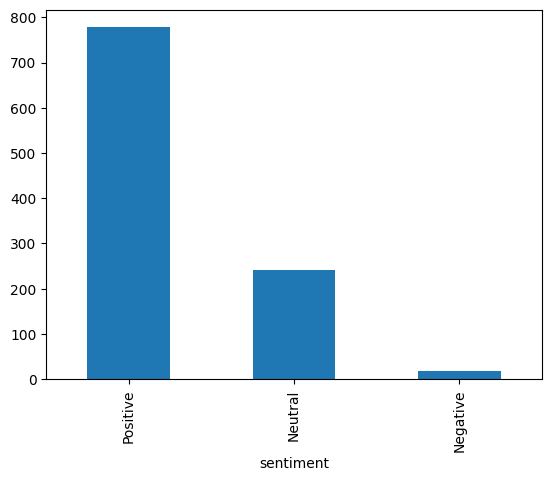

In [27]:
# Plot charts to view the count of different types of sentiment.

filtered_df['sentiment'].value_counts().plot(kind='bar')
plt.show()

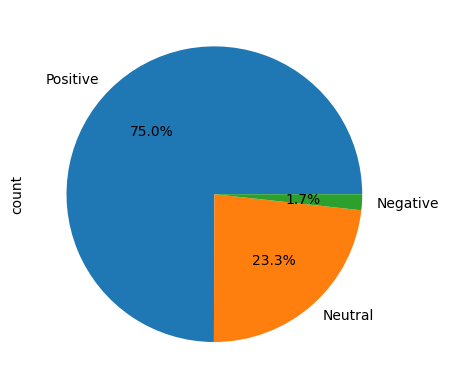

In [28]:
filtered_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [29]:
 # Print the count of each type of review. 
 
print('Number of positive reviews: ', len(filtered_df[filtered_df['sentiment']=='Positive']))
print('Number of neutral reviews: ', len(filtered_df[filtered_df['sentiment']=='Neutral']))
print('Number of negative reviews: ', len(filtered_df[filtered_df['sentiment']=='Negative']))

Number of positive reviews:  778
Number of neutral reviews:  242
Number of negative reviews:  18


**Results**

As seen from the graphs and the count of each type of review, most reviews are positive and very few are negative. Overall, it can be interpreted that since most reviews are positive, the product is performing well however, the number of neutral sentiments may be reduced by analysis to discover areas for improvement and to achieve positive sentiment instead.

In [30]:
# Filter out the positive, negative, and neutral reviews for analysis. 

print('Examples of positive reviews')
positive = filtered_df[filtered_df['sentiment'] == 'Positive'].iloc[:,[3,5]]
positive.head()

Examples of positive reviews


,reviews.text,sentiment
14733,My kids have enjoyed using this device. They h...,Positive
14734,This tablet is the perfect size and so easy to...,Positive
14736,Easy access to book reader. Love watching my N...,Positive
14737,Upgraded; easy to use; thinner; very happy wit...,Positive
14738,I got this tablet on a deal and has good quali...,Positive


In [50]:
print('Examples of negative reviews')
negative = filtered_df[filtered_df['sentiment'] == 'Negative'].iloc[:,[3,5]]

negative= negative.reset_index(drop=True)
ne = negative['reviews.text'][0]
ne


Examples of negative reviews


'Too slow for games and videos i bought it for my youngest son so they wouldnt fight for the ipad but they still do'

In [55]:
print('Examples of neutral reviews')

neutral = filtered_df[filtered_df['sentiment'] == 'Neutral'].iloc[:,[3,5]]

neutral = neutral.reset_index(drop=True)
n = neutral['reviews.text'][3]
n

Examples of neutral reviews


'Just installed, but like it so far. The picture is clear and the price is affordable.'

In [56]:
# The average length of each type of review. 

print('Average length of positive reviews: ', filtered_df[filtered_df['sentiment']=='Positive']['reviews.text'].str.len().mean())
print('Average length of negative reviews: ', filtered_df[filtered_df['sentiment']=='Negative']['reviews.text'].str.len().mean())
print('Average length of neutral reviews: ', filtered_df[filtered_df['sentiment']=='Neutral']['reviews.text'].str.len().mean())

Average length of positive reviews:  129.30077120822622
Average length of negative reviews:  153.11111111111111
Average length of neutral reviews:  167.0785123966942


Check for some possible misclassifications such as a review with a rating greater than 3 has been assigned a negative sentiment while a review with a rating less than 3 has been assigned a positive sentiment.

In [57]:
wrong_positive = filtered_df[(filtered_df['reviews.rating'] < 3) & (filtered_df['sentiment'] == 'Positive')].iloc[:,[3,5]]
wrong_positive = wrong_positive.reset_index(drop=True)
x = wrong_positive['reviews.text'][2]
print(x)
p= TextBlob(x).sentiment.polarity
print('Polarity: ', p)
l = len(x)
print('Length of review: ', l)

Amazon fire is a good tablet if you like e-books. It's also nice to get a six-month subscription to the Washington Post. Their claim to have 16 gigabytes of storage is misleading because it only gives you 5 and then they want to charge you the same amount of money that you paid for the tablet for unlimited storage. Another problem is that you can't flag something as being inappropriate like you can on Samsung Galaxy tablets.
Polarity:  0.32499999999999996
Length of review:  428


**Results**

The example above is a mixed review. However, the analyzer fails to understand the negative feedback. It categorizes it as positive as it finds ’good' and 'nice' in the first two sentences but doesn't take into account the reasoning behind it. Another reason behind such classification may be the long length of the review.

In [58]:
wrong_negative = filtered_df[(filtered_df['reviews.rating'] > 3) & (filtered_df['sentiment'] == 'Negative')].iloc[:,[3,5]]
wrong_negative = wrong_negative.reset_index(drop=True)
x = wrong_negative['reviews.text'][4]
print(x)
p= TextBlob(x).sentiment.polarity
print('Polarity: ', p)
l = len(x)
print('Length of review: ', l)

Got this as a gift for s friend that loves to read books! Very convenient and portable. Doesn't heat up to bad either.
Polarity:  -0.24999999999999992
Length of review:  118


**Results**

The example above again categorizes it as negative probably because of 'bad'. Also, it could be because the phrase 'to bad' is incorrect and doesn't provide useful insight. 

In [59]:
# Export the data.

filtered_df.to_csv('Output.csv')